In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../Datasets/Music_Streaming_Service_User_Survey.csv")

In [33]:
df.head()

,Timestamp,Which music streaming app do you use most often?,How often do you listen to music on any of these apps?,What is the main way you listen to music on these apps?,"How often do you listen to personalized smart playlists (like Discover Weekly, Daily Mix, Stations, etc.)?",Does your music streaming app give you recommendations that fit your tastes?,Do you use more than one streaming service?,Which other music streaming app(s) do you use?,Why do you use more than one?,Does one of your streaming apps give better recommendations than the other? Which one?,What do you wish your streaming app(s) did better? What feature(s) would you add?
0,2019/04/10 12:33:57 PM AST,Spotify,Sometimes (at least once a week),I listen to personalized smart playlists (like...,Sometimes (at least once a week),Sometimes,Yes,Pandora,I got used to using Pandora when I worked in a...,Pandora,I would like to have newer artists/song sugges...
1,2019/04/10 12:33:59 PM AST,Spotify,Sometimes (at least once a week),I listen to personalized smart playlists (like...,Sometimes (at least once a week),Often,No,NaN,NaN,NaN,Kind of miss the random-ness of Pandora. You c...
2,2019/04/10 12:35:55 PM AST,Spotify,Often (every day),I listen to albums,Sometimes (at least once a week),Sometimes,No,NaN,NaN,NaN,more foreign music
3,2019/04/10 12:37:48 PM AST,Pandora,Often (every day),I listen to “radio” stations (based on artists...,Almost never,Occasionally,Yes,Spotify,"Pandora is better for ""radio"" stations in disc...",Pandora,I wish it continuously added new songs to radi...
4,2019/04/10 12:38:26 PM AST,Apple Music,Often (every day),I create my own playlists,Sometimes (at least once a week),Sometimes,No,NaN,NaN,NaN,Better recommendations for music that I like. ...


In [34]:
df.rename(columns={
    "Which music streaming app do you use most often?":"most_used_app", 
    "How often do you listen to music on any of these apps?":"use_frequency", 
    "What is the main way you listen to music on these apps?":"use_method",
    "How often do you listen to personalized smart playlists (like Discover Weekly, Daily Mix, Stations, etc.)?":"use_of_algorithms",
    "Does your music streaming app give you recommendations that fit your tastes? ":"app_fit",
    "Do you use more than one streaming service?":"additional_app",
    "Which other music streaming app(s) do you use? ":"other_app",
    "Why do you use more than one?":"other_reason",
    "Does one of your streaming apps give better recommendations than the other? Which one?":"better_recommendations",
    "What do you wish your streaming app(s) did better? What feature(s) would you add?":"feedback",
}, inplace = True)           


In [35]:
df.head()

,Timestamp,most_used_app,use_frequency,use_method,use_of_algorithms,app_fit,additional_app,other_app,other_reason,better_recommendations,feedback
0,2019/04/10 12:33:57 PM AST,Spotify,Sometimes (at least once a week),I listen to personalized smart playlists (like...,Sometimes (at least once a week),Sometimes,Yes,Pandora,I got used to using Pandora when I worked in a...,Pandora,I would like to have newer artists/song sugges...
1,2019/04/10 12:33:59 PM AST,Spotify,Sometimes (at least once a week),I listen to personalized smart playlists (like...,Sometimes (at least once a week),Often,No,NaN,NaN,NaN,Kind of miss the random-ness of Pandora. You c...
2,2019/04/10 12:35:55 PM AST,Spotify,Often (every day),I listen to albums,Sometimes (at least once a week),Sometimes,No,NaN,NaN,NaN,more foreign music
3,2019/04/10 12:37:48 PM AST,Pandora,Often (every day),I listen to “radio” stations (based on artists...,Almost never,Occasionally,Yes,Spotify,"Pandora is better for ""radio"" stations in disc...",Pandora,I wish it continuously added new songs to radi...
4,2019/04/10 12:38:26 PM AST,Apple Music,Often (every day),I create my own playlists,Sometimes (at least once a week),Sometimes,No,NaN,NaN,NaN,Better recommendations for music that I like. ...


In [39]:
df['app_fit'].replace("Occasionally", "Sometimes", inplace=True)
df['app_fit'].replace(["Often", "A lot of the time", "Almost always"], "Most of the time", inplace=True)

In [42]:
df.app_fit.value_counts()

Most of the time    34
Sometimes           23
Almost never         3
Name: app_fit, dtype: int64

In [43]:
df.use_frequency.value_counts()

Often (every day)                   54
Sometimes (at least once a week)     6
Occasionally                         1
Name: use_frequency, dtype: int64

In [44]:
df.most_used_app.value_counts()

Spotify              48
Apple Music           5
Google Play Music     3
Pandora               1
Amazon Unlimited      1
iHeartRadio           1
YouTube               1
Tidal                 1
None                  1
Name: most_used_app, dtype: int64

In [45]:
df.use_method.value_counts()

I create my own playlists                                                           29
I listen to personalized smart playlists (like Discover Weekly, Daily Mix, etc.)    13
I listen to albums                                                                  10
I listen to “radio” stations (based on artists/genre)                                7
I find the song I want to hear                                                       1
I listen to new releases                                                             1
Name: use_method, dtype: int64

In [47]:
df.use_of_algorithms.value_counts(1)

Sometimes (at least once a week)    0.540984
Occasionally                        0.245902
Often (every day)                   0.131148
Almost never                        0.081967
Name: use_of_algorithms, dtype: float64

In [63]:
df.groupby("use_of_algorithms").size()

use_of_algorithms
Almost never                         5
Occasionally                        15
Often (every day)                    8
Sometimes (at least once a week)    33
dtype: int64

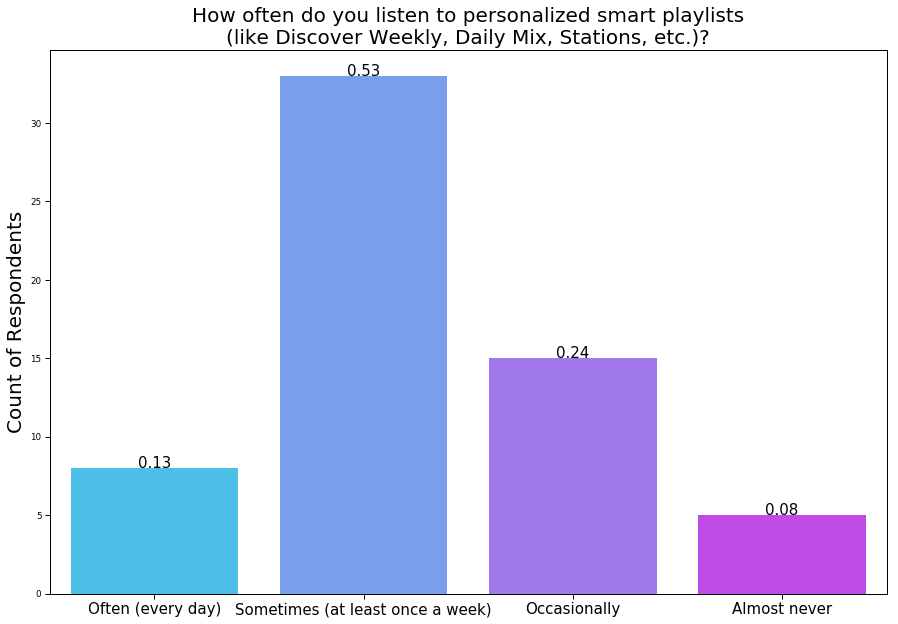

In [127]:
from textwrap import wrap

plt.figure(figsize=(15,10))
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":20})   
ax = sns.countplot(data=df, x = "use_of_algorithms", palette="cool", order=["Often (every day)", "Sometimes (at least once a week)", "Occasionally", "Almost never"])
ax.set(xlabel=None, ylabel='Count of Respondents')
ax.set_title("\n".join(wrap("How often do you listen to personalized smart playlists (like Discover Weekly, Daily Mix, Stations, etc.)?", 60)))
ax.set_xticklabels(labels=["Often (every day)", "Sometimes (at least once a week)", "Occasionally", "Almost never"], fontsize=15)
for p in ax.patches:
    total = len(df)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.savefig('use_of_algorithms.png', transparent=True)

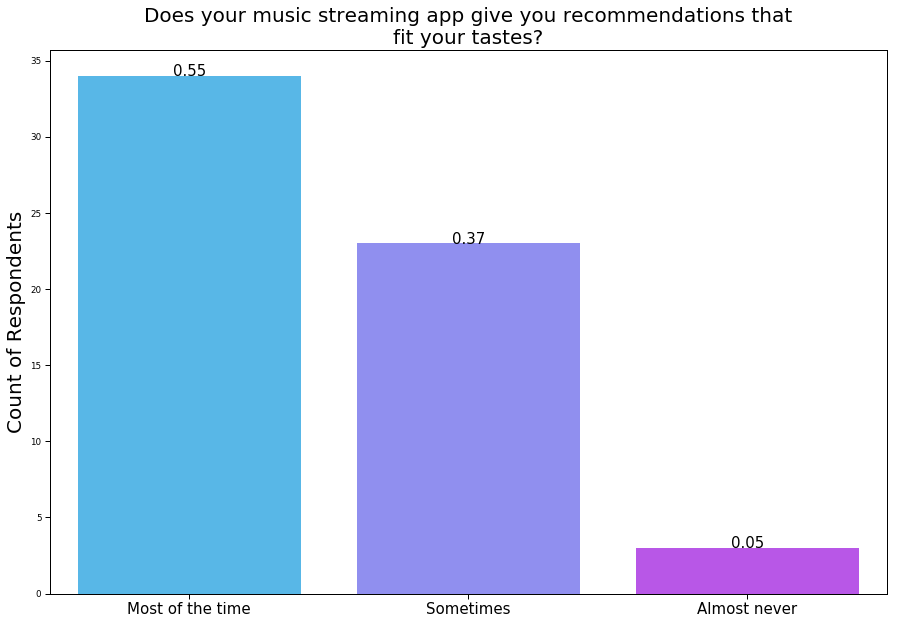

In [131]:
plt.figure(figsize=(15,10))
sns.set_context("paper", rc={"font.size":15,"axes.titlesize":20,"axes.labelsize":20})   
ax = sns.countplot(data=df, x = "app_fit", palette="cool", order=["Most of the time", "Sometimes", "Almost never"])
ax.set(xlabel=None, ylabel='Count of Respondents')
ax.set_title("\n".join(wrap("Does your music streaming app give you recommendations that fit your tastes?", 60)))
ax.set_xticklabels(labels=["Most of the time", "Sometimes", "Almost never"], fontsize=15)
for p in ax.patches:
    total = len(df)
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height,
            '{:1.2f}'.format(height/total),
            ha="center")
plt.savefig('app_fit.png', transparent=True)